# Loading the libaries

In [273]:
import numpy as np
import seaborn as sns
import pandas as pd
from scipy import stats
from scipy.stats import skew

# Loading the dataset

In [274]:
train = pd.read_csv('C:/Users/Anoop Srivastava/Project_Machine_Learning/Completed Projects/House Pricing Project/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('C:/Users/Anoop Srivastava/Project_Machine_Learning/Completed Projects/House Pricing Project/house-prices-advanced-regression-techniques/test.csv')

In [275]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [276]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [277]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [278]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [279]:
# Splitting the features into categorical and continuous columns

cat = []
con = []

for i in train.columns:
    if (train[i].dtypes=='object'):
        cat.append(i)
    else:
        con.append(i)

In [280]:
cat

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [281]:
con

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [282]:
con.remove('Id')

# Missing columns treatment

In [283]:
miss1 = (train.isna().sum()/train.shape[0])*100
miss1 = pd.DataFrame(miss1, columns=['count'])
miss1.index.names = ['Features']
miss1 = miss1.sort_values(by='count', ascending=False)
miss1[:7]

,count
Features,
PoolQC,99.520548
MiscFeature,96.301370
Alley,93.767123
Fence,80.753425
FireplaceQu,47.260274
LotFrontage,17.739726
GarageYrBlt,5.547945


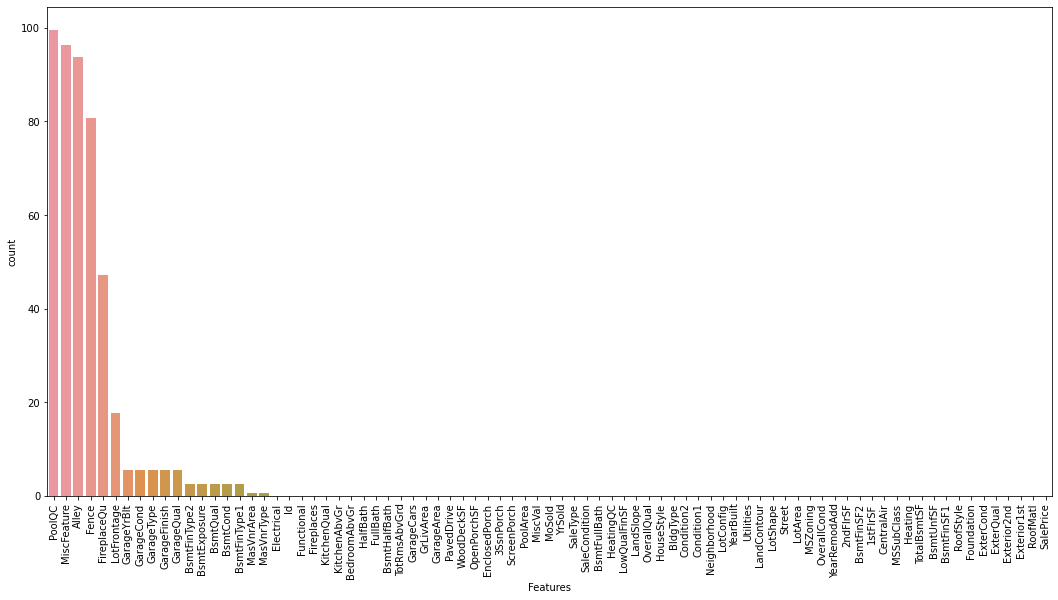

In [284]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 9))
sns.barplot(data=miss1, x=miss1.index, y='count')
plt.xticks(rotation=90)
plt.show()

In [285]:
miss2 = (test.isna().sum()/test.shape[0])*100
miss2 = pd.DataFrame(miss2, columns=['count'])
miss2.index.names = ['Features']
miss2 = miss2.sort_values(by='count', ascending=False)
miss2[:7]

,count
Features,
PoolQC,99.794380
MiscFeature,96.504455
Alley,92.666210
Fence,80.123372
FireplaceQu,50.034270
LotFrontage,15.558602
GarageYrBlt,5.346127


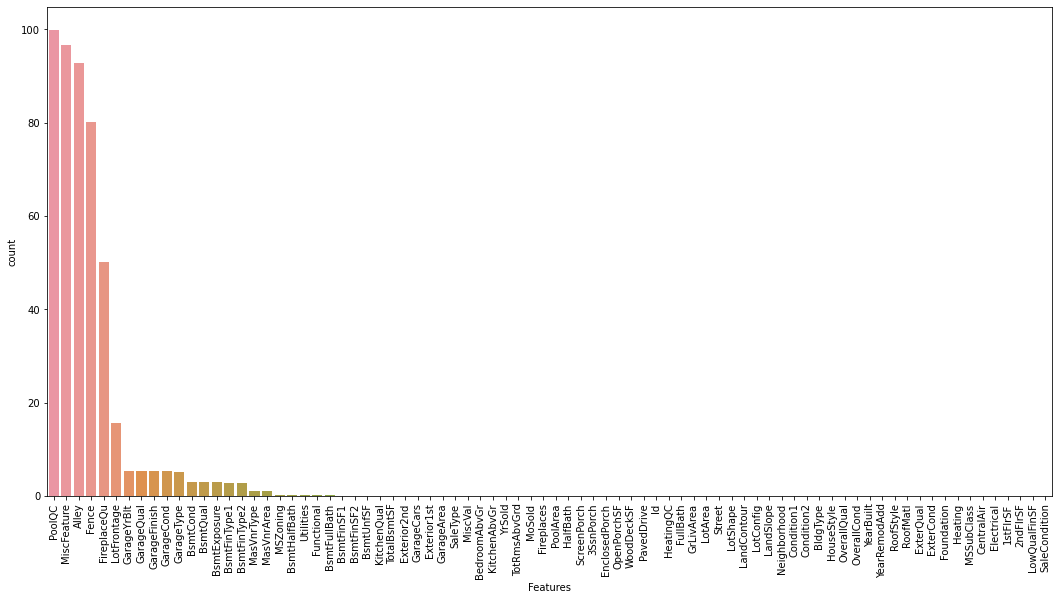

In [286]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 9))
sns.barplot(data=miss2, x=miss2.index, y='count')
plt.xticks(rotation=90)
plt.show()

In [287]:
# Checking top missing columns

c = miss2[:7].index
c

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage',
       'GarageYrBlt'],
      dtype='object', name='Features')

In [288]:
# So we can replace here top 6 missing features from both to '0'

train['PoolQC'].fillna('0', inplace=True)
train['MiscFeature'].fillna("0", inplace=True)
train['Alley'].fillna("0", inplace=True)
train['Fence'].fillna("0", inplace=True)
train['FireplaceQu'].fillna("0", inplace=True)
train['LotFrontage'].fillna("0", inplace=True)

test['PoolQC'].fillna("0", inplace=True)
test['MiscFeature'].fillna("0", inplace=True)
test['Alley'].fillna("0", inplace=True)
test['Fence'].fillna("0", inplace=True)
test['FireplaceQu'].fillna("0", inplace=True)
test['LotFrontage'].fillna("0", inplace=True)

In [289]:
train.isna().sum()

Features
Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

In [290]:
miss1 = (train.isna().sum()/train.shape[0])*100
miss1 = pd.DataFrame(miss1, columns=['count'])
miss1.index.names = ['Features']
miss1 = miss1.sort_values(by='count', ascending=False)
miss1[:7]

,count
Features,
GarageYrBlt,5.547945
GarageCond,5.547945
GarageFinish,5.547945
GarageQual,5.547945
GarageType,5.547945
BsmtExposure,2.602740
BsmtFinType2,2.602740


In [291]:
miss2 = (test.isna().sum()/test.shape[0])*100
miss2 = pd.DataFrame(miss2, columns=['count'])
miss2.index.names = ['Features']
miss2 = miss2.sort_values(by='count', ascending=False)
miss2[:7]

,count
Features,
GarageFinish,5.346127
GarageQual,5.346127
GarageCond,5.346127
GarageYrBlt,5.346127
GarageType,5.209047
BsmtCond,3.084304
BsmtExposure,3.015764


In [292]:
from sklearn.impute import SimpleImputer
si1 = SimpleImputer(strategy='mean')
si2 = SimpleImputer(strategy='most_frequent')

A = pd.DataFrame(si1.fit_transform(train[con]), columns=con)
B = pd.DataFrame(si2.fit_transform(train[cat]), columns=cat)

train_new = A.join(B)
train_new

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,0.0,...,Attchd,RFn,TA,TA,Y,0,0,0,WD,Normal
1,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,0.0,...,Attchd,RFn,TA,TA,Y,0,0,0,WD,Normal
2,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,0.0,...,Attchd,RFn,TA,TA,Y,0,0,0,WD,Normal
3,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,0.0,...,Detchd,Unf,TA,TA,Y,0,0,0,WD,Abnorml
4,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,0.0,...,Attchd,RFn,TA,TA,Y,0,0,0,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60.0,62.0,7917.0,6.0,5.0,1999.0,2000.0,0.0,0.0,0.0,...,Attchd,RFn,TA,TA,Y,0,0,0,WD,Normal
1456,20.0,85.0,13175.0,6.0,6.0,1978.0,1988.0,119.0,790.0,163.0,...,Attchd,Unf,TA,TA,Y,0,MnPrv,0,WD,Normal
1457,70.0,66.0,9042.0,7.0,9.0,1941.0,2006.0,0.0,275.0,0.0,...,Attchd,RFn,TA,TA,Y,0,GdPrv,Shed,WD,Normal
1458,20.0,68.0,9717.0,5.0,6.0,1950.0,1996.0,0.0,49.0,1029.0,...,Attchd,Unf,TA,TA,Y,0,0,0,WD,Normal


In [293]:
from sklearn.impute import SimpleImputer
si1 = SimpleImputer(strategy='mean')
si2 = SimpleImputer(strategy='most_frequent')

con.remove('SalePrice')

A = pd.DataFrame(si1.fit_transform(test[con]), columns=con)
B = pd.DataFrame(si2.fit_transform(test[cat]), columns=cat)

con.append('SalePrice')

test_new = A.join(B)
test_new

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,20.0,80.0,11622.0,5.0,6.0,1961.0,1961.0,0.0,468.0,144.0,...,Attchd,Unf,TA,TA,Y,0,MnPrv,0,WD,Normal
1,20.0,81.0,14267.0,6.0,6.0,1958.0,1958.0,108.0,923.0,0.0,...,Attchd,Unf,TA,TA,Y,0,0,Gar2,WD,Normal
2,60.0,74.0,13830.0,5.0,5.0,1997.0,1998.0,0.0,791.0,0.0,...,Attchd,Fin,TA,TA,Y,0,MnPrv,0,WD,Normal
3,60.0,78.0,9978.0,6.0,6.0,1998.0,1998.0,20.0,602.0,0.0,...,Attchd,Fin,TA,TA,Y,0,0,0,WD,Normal
4,120.0,43.0,5005.0,8.0,5.0,1992.0,1992.0,0.0,263.0,0.0,...,Attchd,RFn,TA,TA,Y,0,0,0,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160.0,21.0,1936.0,4.0,7.0,1970.0,1970.0,0.0,0.0,0.0,...,Attchd,Unf,TA,TA,Y,0,0,0,WD,Normal
1455,160.0,21.0,1894.0,4.0,5.0,1970.0,1970.0,0.0,252.0,0.0,...,CarPort,Unf,TA,TA,Y,0,0,0,WD,Abnorml
1456,20.0,160.0,20000.0,5.0,7.0,1960.0,1996.0,0.0,1224.0,0.0,...,Detchd,Unf,TA,TA,Y,0,0,0,WD,Abnorml
1457,85.0,62.0,10441.0,5.0,5.0,1992.0,1992.0,0.0,337.0,0.0,...,Attchd,Unf,TA,TA,Y,0,MnPrv,Shed,WD,Normal


# Removing skewness and outliers

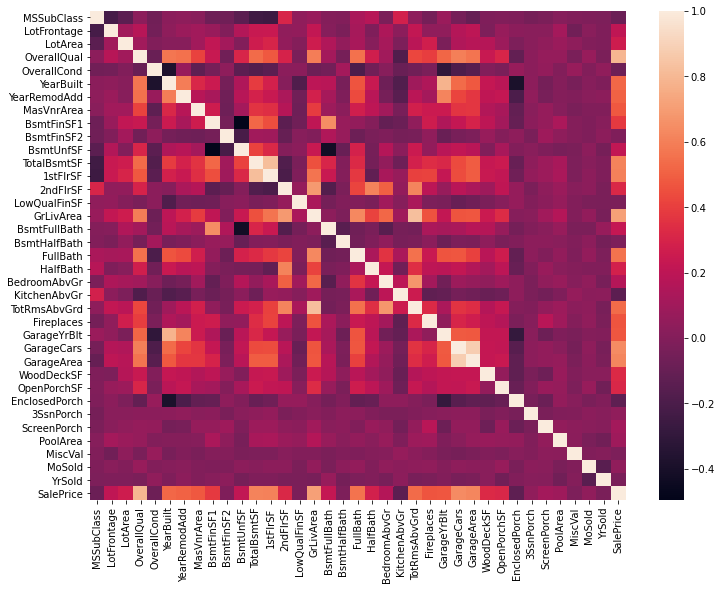

In [294]:
corr = train_new[con].corr()
plt.figure(figsize=(12, 9))
sns.heatmap(corr)
plt.show()

In [295]:
corr = pd.DataFrame(corr, columns=con)
corr = corr['SalePrice'].sort_values(ascending=False)*100

In [296]:
# Top 15 co-related features

corr[:16]

SalePrice       100.000000
OverallQual      79.098160
GrLivArea        70.862448
GarageCars       64.040920
GarageArea       62.343144
TotalBsmtSF      61.358055
1stFlrSF         60.585218
FullBath         56.066376
TotRmsAbvGrd     53.372316
YearBuilt        52.289733
YearRemodAdd     50.710097
MasVnrArea       47.524132
GarageYrBlt      47.017745
Fireplaces       46.692884
BsmtFinSF1       38.641981
WoodDeckSF       32.441344
Name: SalePrice, dtype: float64

1.8828757597682129


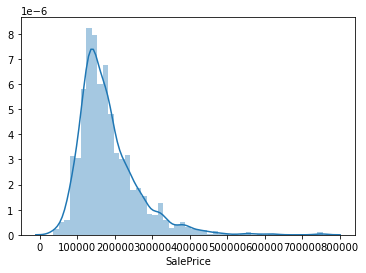

In [297]:
sns.distplot(train_new['SalePrice'])
print(train_new['SalePrice'].skew())

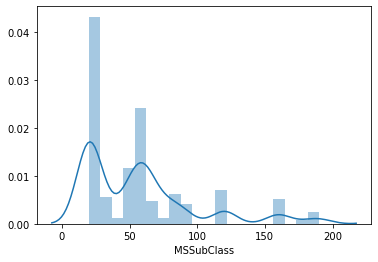

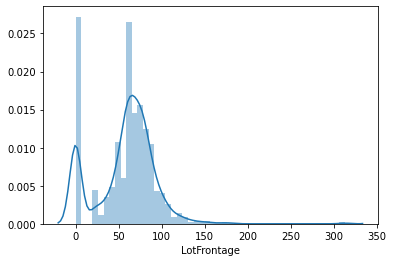

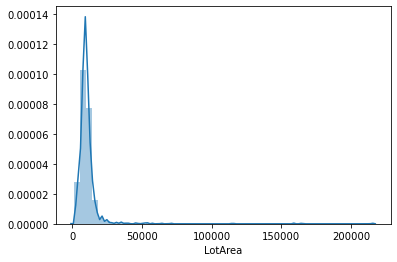

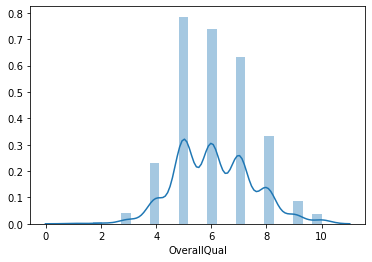

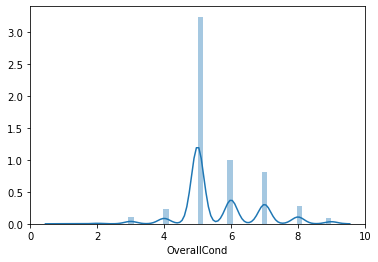

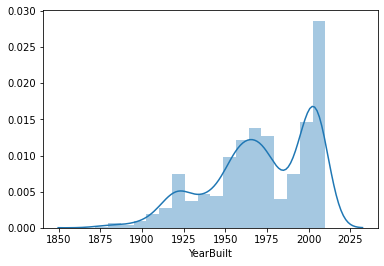

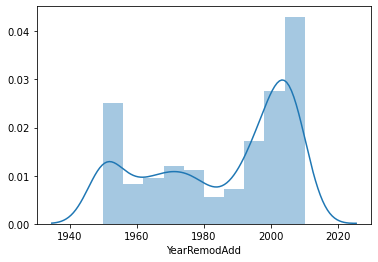

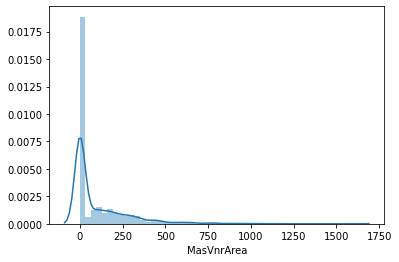

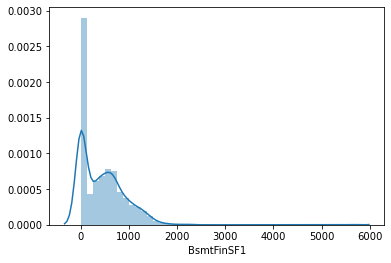

C:\Users\Anoop Srivastava\anaconda3.1\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


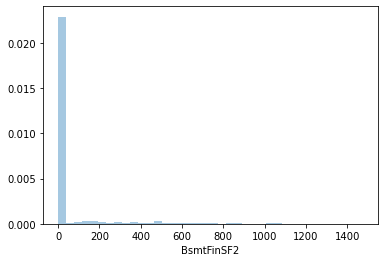

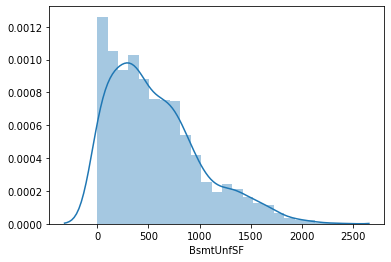

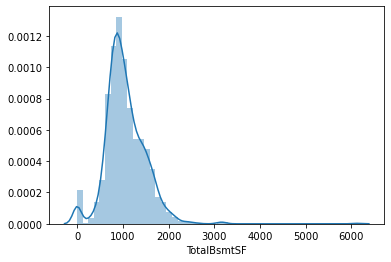

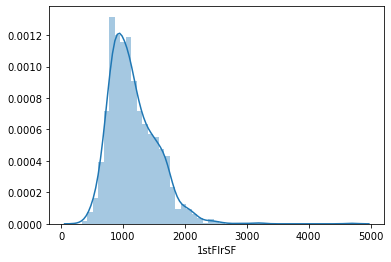

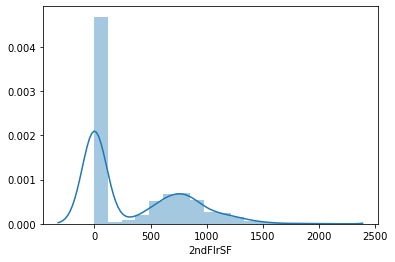

C:\Users\Anoop Srivastava\anaconda3.1\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


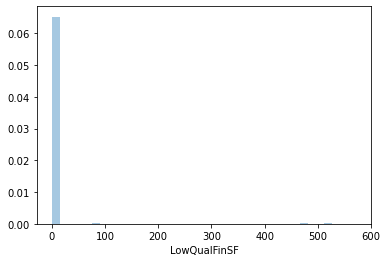

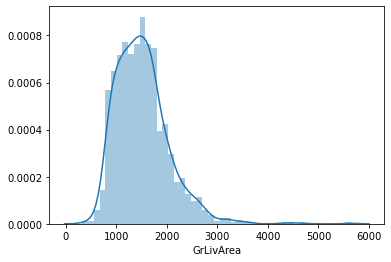

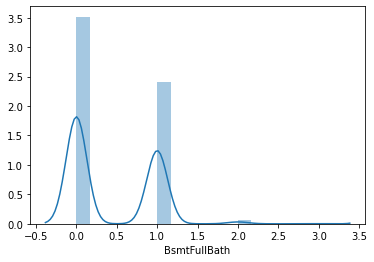

C:\Users\Anoop Srivastava\anaconda3.1\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


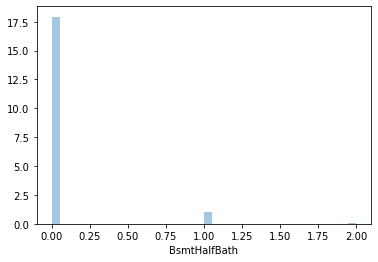

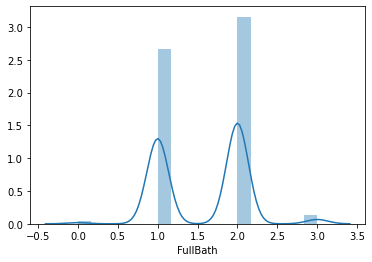

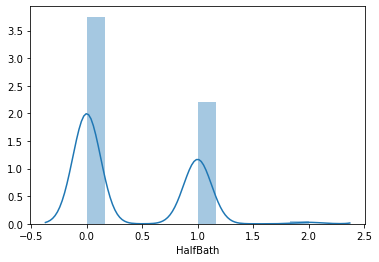

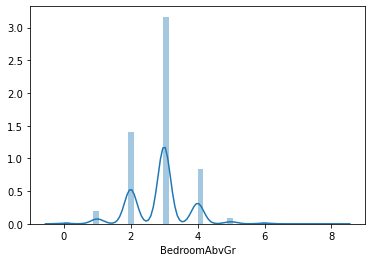

C:\Users\Anoop Srivastava\anaconda3.1\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


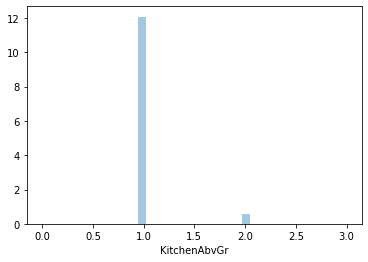

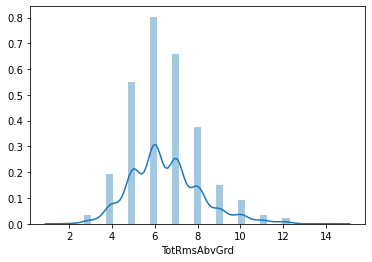

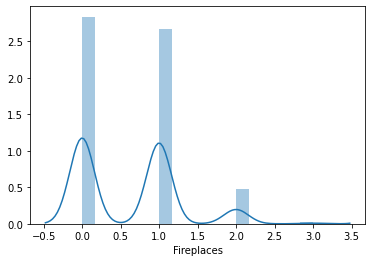

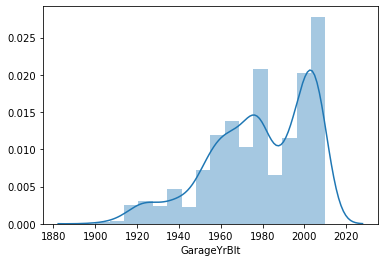

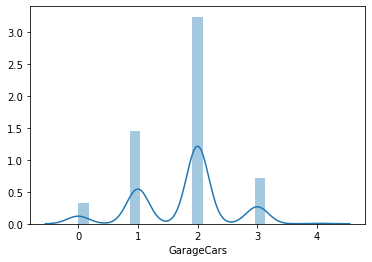

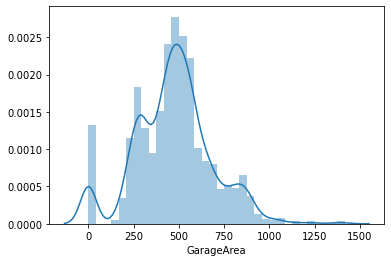

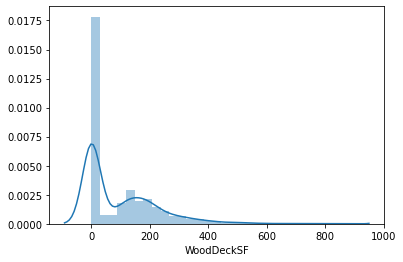

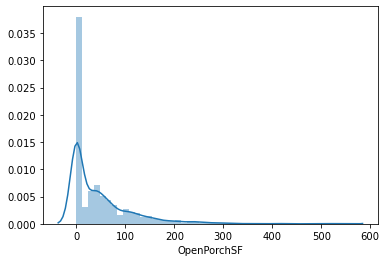

C:\Users\Anoop Srivastava\anaconda3.1\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


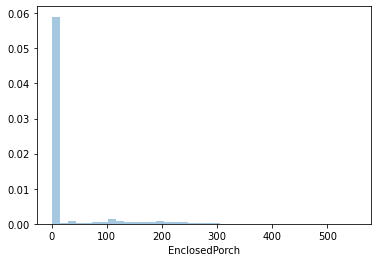

C:\Users\Anoop Srivastava\anaconda3.1\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


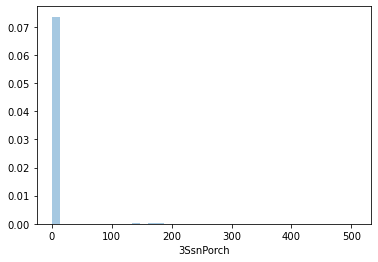

C:\Users\Anoop Srivastava\anaconda3.1\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


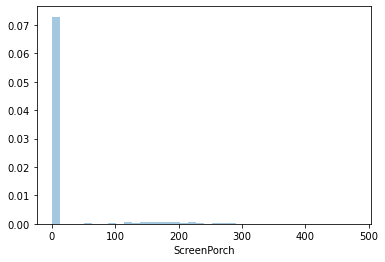

C:\Users\Anoop Srivastava\anaconda3.1\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


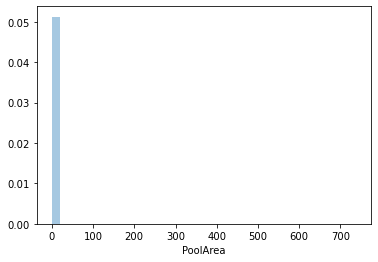

C:\Users\Anoop Srivastava\anaconda3.1\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


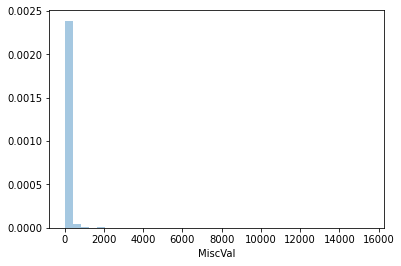

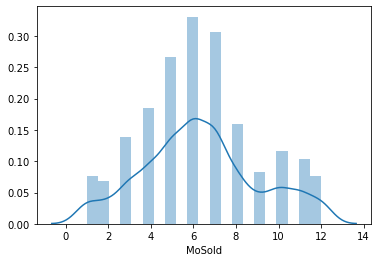

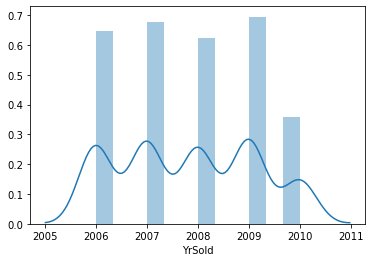

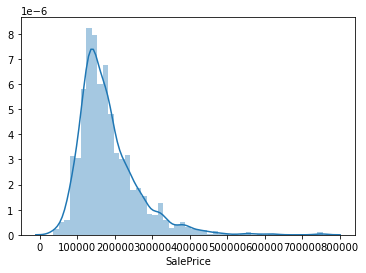

In [298]:
# Checking the distibution plot of the continuous columns

import seaborn as sns
for i in con:
    sns.distplot(train_new[i])
    plt.show()

In [299]:
# Fetching the features having skewness more than 0.75

skewed = train_new[con].apply(lambda x: skew(x))
skewed = skewed[skewed > 0.75]
skewed = skewed.index
skewed

Index(['MSSubClass', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtHalfBath', 'KitchenAbvGr', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'SalePrice'],
      dtype='object')

In [300]:
train_new[skewed] = np.log1p(train_new[skewed])
skewed = skewed.drop('SalePrice')
test_new[skewed] = np.log1p(test_new[skewed])

In [302]:
con.append('SalePrice')

In [305]:
u = np.mean(train_new['SalePrice'])
s = np.std(train_new['SalePrice'])
print('Mean is: {}'.format(u))
print('Std. is: {}'.format(s))
u1 = u
s1 = s

Mean is: 12.024057394918371
Std. is: 0.39931245219387496


In [306]:
train_new['SalePrice']

0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
          ...    
1455    12.072547
1456    12.254868
1457    12.493133
1458    11.864469
1459    11.901590
Name: SalePrice, Length: 1460, dtype: float64

In [310]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
train_new[con] = ss.fit_transform(train_new[con])
con.remove('SalePrice')
test_new[con] = ss.fit_transform(test_new[con])
con.append('SalePrice')

In [311]:
out1 = []

for i in con:
    out1.append(i)
    out2 = []
    for j in train_new[i]:
        if np.abs(j) > 3:
            out2.append(j)
    out1.append(out2)

In [312]:
out1

['MSSubClass',
 [],
 'LotFrontage',
 [3.3583996689194455,
  3.3583996689194455,
  7.369662271535608,
  3.185251642907237,
  3.58926370360239,
  7.369662271535608],
 'LotArea',
 [3.3145096504851677,
  -3.3548176340007676,
  -3.255701628974895,
  -3.0496860344939556,
  -3.255701628974895,
  -3.255701628974895,
  5.5408833597512075,
  6.126490223054398,
  5.608514600935469,
  -3.255701628974895,
  3.4206198281885207,
  -3.255701628974895,
  -3.028093737829283,
  3.9755291608584353,
  3.4249837752608374,
  -3.4414815039020143,
  -3.028093737829283,
  -3.486315015162496,
  -3.255701628974895,
  3.167441703876833,
  4.916985486029505,
  3.435019769224273,
  -3.255701628974895,
  3.1259555866116844,
  -3.7511767199739188,
  -3.255701628974895,
  -3.4326382146317855,
  -3.504543608942998,
  -3.255701628974895,
  -3.255701628974895,
  3.777941761294966,
  3.564171610150424,
  -3.4326382146317855],
 'OverallQual',
 [-3.6884129023269017, -3.6884129023269017],
 'OverallCond',
 [-3.214027371743885,

In [313]:
# Above we saw that there are various features where we can see the outliers in a huge number

Q1 = train_new['MiscVal'].quantile(0.05)
Q3 = train_new['MiscVal'].quantile(0.95)
IQR = Q3 - Q1
train_new = train_new[(train_new.MiscVal >= Q1 - IQR*1.5) & (train_new.MiscVal <= Q3 + IQR*1.5)] 

Q1 = train_new['ScreenPorch'].quantile(0.05)
Q3 = train_new['ScreenPorch'].quantile(0.95)
IQR = Q3 - Q1
train_new = train_new[(train_new.ScreenPorch >= Q1 - IQR*1.5) & (train_new.ScreenPorch <= Q3 + IQR*1.5)] 

train_new

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,0.424462,0.212877,-0.133270,0.651479,-0.517200,1.050994,0.878668,1.193074,0.779431,-0.355342,...,Attchd,RFn,TA,TA,Y,0,0,0,WD,Normal
1,-1.125202,0.645747,0.113413,-0.071836,2.179628,0.156734,-0.429577,-0.815959,0.888257,-0.355342,...,Attchd,RFn,TA,TA,Y,0,0,0,WD,Normal
2,0.424462,0.299451,0.420049,0.651479,-0.517200,0.984752,0.830215,1.121030,0.654803,-0.355342,...,Attchd,RFn,TA,TA,Y,0,0,0,WD,Normal
3,0.645073,0.068587,0.103317,0.651479,-0.517200,-1.863632,-0.720298,-0.815959,0.384539,-0.355342,...,Detchd,Unf,TA,TA,Y,0,0,0,WD,Abnorml
4,0.424462,0.761179,0.878431,1.374795,-0.517200,0.951632,0.733308,1.412710,0.754400,-0.355342,...,Attchd,RFn,TA,TA,Y,0,0,0,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,-1.125202,0.126303,-0.363839,0.651479,-0.517200,1.084115,0.975575,-0.815959,0.598076,-0.355342,...,Attchd,RFn,TA,TA,Y,0,0,0,WD,Normal
1455,0.424462,0.126303,-0.259231,-0.071836,-0.517200,0.918511,0.733308,-0.815959,-1.414140,-0.355342,...,Attchd,RFn,TA,TA,Y,0,0,0,WD,Normal
1456,-1.125202,0.790037,0.725429,-0.071836,0.381743,0.222975,0.151865,1.004570,0.816966,2.409693,...,Attchd,Unf,TA,TA,Y,0,MnPrv,0,WD,Normal
1458,-1.125202,0.299451,0.136833,-0.795151,0.381743,-0.704406,0.539493,-0.815959,-0.106220,3.405917,...,Attchd,Unf,TA,TA,Y,0,0,0,WD,Normal


In [314]:
sample = []

for i in train_new['SaleCondition'].unique():
    s = train_new[train_new.SaleCondition==i]['SalePrice'].values
    sample.append(s)
    
pval = stats.f_oneway(*sample)[1]

In [315]:
# Creating a function for anova test

def anova(df):
    anv = pd.DataFrame()
    anv['feature'] = cat
    pvals = []
    for col in cat:
        sample = []
        for i in train_new[col].unique():
            s = train_new[train_new[col]==i]['SalePrice'].values
            sample.append(s)
        pval = stats.f_oneway(*sample)[1]
        pvals.append(pval)
    
    anv['pvals'] = pvals
    return anv.sort_values(by='pvals', ascending=False)

In [316]:
k = anova(train_new)
k['score'] = np.log(1/k['pvals'].values)
k = k.sort_values(by='score', ascending=False)
k

,feature,pvals,score
8,Neighborhood,2.793769e-232,533.172350
18,ExterQual,7.335457e-187,428.590693
30,KitchenQual,7.724311e-181,414.723529
21,BsmtQual,4.171049e-177,406.129394
34,GarageFinish,1.604780e-133,305.770830
32,FireplaceQu,1.449298e-109,250.610696
20,Foundation,1.062465e-107,246.316013
27,HeatingQC,4.225835e-79,180.463006
24,BsmtFinType1,2.057176e-66,151.249282
33,GarageType,2.388739e-63,144.192095


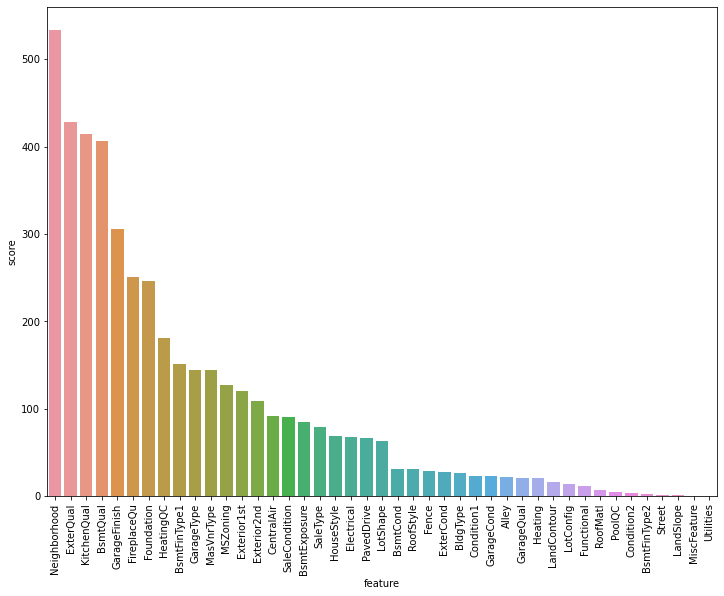

In [317]:
plt.figure(figsize=(12, 9))
sns.barplot(data=k, x='feature', y='score')
plt.xticks(rotation=90)
plt.show()

In [318]:
# Label encoding of the categorical columns

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in cat:
    train_new[i] = le.fit_transform(train_new[i])
    test_new[i] = le.fit_transform(test_new[i])

In [319]:
train_new

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,0.424462,0.212877,-0.133270,0.651479,-0.517200,1.050994,0.878668,1.193074,0.779431,-0.355342,...,1,1,4,4,2,0,0,0,8,4
1,-1.125202,0.645747,0.113413,-0.071836,2.179628,0.156734,-0.429577,-0.815959,0.888257,-0.355342,...,1,1,4,4,2,0,0,0,8,4
2,0.424462,0.299451,0.420049,0.651479,-0.517200,0.984752,0.830215,1.121030,0.654803,-0.355342,...,1,1,4,4,2,0,0,0,8,4
3,0.645073,0.068587,0.103317,0.651479,-0.517200,-1.863632,-0.720298,-0.815959,0.384539,-0.355342,...,5,2,4,4,2,0,0,0,8,0
4,0.424462,0.761179,0.878431,1.374795,-0.517200,0.951632,0.733308,1.412710,0.754400,-0.355342,...,1,1,4,4,2,0,0,0,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,-1.125202,0.126303,-0.363839,0.651479,-0.517200,1.084115,0.975575,-0.815959,0.598076,-0.355342,...,1,1,4,4,2,0,0,0,8,4
1455,0.424462,0.126303,-0.259231,-0.071836,-0.517200,0.918511,0.733308,-0.815959,-1.414140,-0.355342,...,1,1,4,4,2,0,0,0,8,4
1456,-1.125202,0.790037,0.725429,-0.071836,0.381743,0.222975,0.151865,1.004570,0.816966,2.409693,...,1,2,4,4,2,0,3,0,8,4
1458,-1.125202,0.299451,0.136833,-0.795151,0.381743,-0.704406,0.539493,-0.815959,-0.106220,3.405917,...,1,2,4,4,2,0,0,0,8,4


In [320]:
test_new

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,-1.116585,0.684849,0.561787,-0.751101,0.400766,-0.340945,-1.072885,-0.797004,0.648586,2.230852,...,1,2,3,4,2,0,3,0,8,4
1,-1.116585,0.715852,0.970407,-0.054877,0.400766,-0.439695,-1.214908,0.995686,0.876910,-0.370792,...,1,2,3,4,2,0,0,1,8,4
2,0.414449,0.498831,0.908413,-0.751101,-0.497418,0.844059,0.678742,-0.797004,0.825007,-0.370792,...,1,0,3,4,2,0,3,0,8,4
3,0.414449,0.622843,0.257857,-0.054877,0.400766,0.876976,0.678742,0.366390,0.733205,-0.370792,...,1,0,3,4,2,0,0,0,8,4
4,1.397832,-0.462261,-1.116969,1.337571,-0.497418,0.679475,0.394694,-0.797004,0.455095,-0.370792,...,1,1,3,4,2,0,0,0,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1.807907,-1.144325,-3.009264,-1.447325,1.298950,-0.044694,-0.646813,-0.797004,-1.422373,-0.370792,...,1,2,3,4,2,0,0,0,8,4
1455,1.807907,-1.144325,-3.052953,-1.447325,-0.497418,-0.044694,-0.646813,-0.797004,0.440765,-0.370792,...,4,2,3,4,2,0,0,0,8,0
1456,-1.116585,3.165085,1.643551,-0.751101,1.298950,-0.373861,0.584059,-0.797004,0.971857,-0.370792,...,5,2,3,4,2,0,0,0,8,0
1457,0.907598,0.126795,0.348243,-0.751101,-0.497418,0.679475,0.394694,-0.797004,0.538294,-0.370792,...,1,2,3,4,2,0,3,3,8,4


In [321]:
# Splitting the data into X and Y

X = train_new.drop(labels=['SalePrice'], axis=1)
Y = train_new['SalePrice']

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=40)

# Decision Tree

In [326]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=40, max_depth=8, criterion='mae')
model = dtr.fit(xtrain, ytrain)
ypred = model.predict(xtest)

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print('r2 score is: {}'.format(r2_score(ypred, ytest)))
print('mae is: {}'.format(mean_absolute_error(ypred, ytest)))

r2 score is: 0.7700050050558753
mae is: 0.32068301453097636


In [327]:
xtest = test_new
xtest

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,-1.116585,0.684849,0.561787,-0.751101,0.400766,-0.340945,-1.072885,-0.797004,0.648586,2.230852,...,1,2,3,4,2,0,3,0,8,4
1,-1.116585,0.715852,0.970407,-0.054877,0.400766,-0.439695,-1.214908,0.995686,0.876910,-0.370792,...,1,2,3,4,2,0,0,1,8,4
2,0.414449,0.498831,0.908413,-0.751101,-0.497418,0.844059,0.678742,-0.797004,0.825007,-0.370792,...,1,0,3,4,2,0,3,0,8,4
3,0.414449,0.622843,0.257857,-0.054877,0.400766,0.876976,0.678742,0.366390,0.733205,-0.370792,...,1,0,3,4,2,0,0,0,8,4
4,1.397832,-0.462261,-1.116969,1.337571,-0.497418,0.679475,0.394694,-0.797004,0.455095,-0.370792,...,1,1,3,4,2,0,0,0,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1.807907,-1.144325,-3.009264,-1.447325,1.298950,-0.044694,-0.646813,-0.797004,-1.422373,-0.370792,...,1,2,3,4,2,0,0,0,8,4
1455,1.807907,-1.144325,-3.052953,-1.447325,-0.497418,-0.044694,-0.646813,-0.797004,0.440765,-0.370792,...,4,2,3,4,2,0,0,0,8,0
1456,-1.116585,3.165085,1.643551,-0.751101,1.298950,-0.373861,0.584059,-0.797004,0.971857,-0.370792,...,5,2,3,4,2,0,0,0,8,0
1457,0.907598,0.126795,0.348243,-0.751101,-0.497418,0.679475,0.394694,-0.797004,0.538294,-0.370792,...,1,2,3,4,2,0,3,3,8,4


In [328]:
price = model.predict(xtest)
price.shape

(1459,)

In [329]:
new_price = []

for i in price:
    new_price.append((i*s1) + u1)

In [330]:
new_price

[11.719947764402773,
 11.90951441439162,
 12.09570501563197,
 12.09570501563197,
 12.271396795480563,
 12.09570501563197,
 11.58059345919473,
 12.09570501563197,
 12.076538317817633,
 11.896784135169792,
 12.14287100932926,
 11.350418300109098,
 11.350418300109098,
 11.90497430948015,
 11.852963552978371,
 12.936754021718007,
 12.429220196836349,
 12.675766851909557,
 12.530863263560562,
 12.936754021718007,
 12.429220196836349,
 12.271396795480563,
 12.09570501563197,
 12.14287100932926,
 12.076538317817633,
 12.270224467498375,
 12.589057589629144,
 12.429220196836349,
 12.333737188109705,
 12.09570501563197,
 12.14287100932926,
 11.608244735642288,
 12.09570501563197,
 12.730786626447905,
 12.429220196836349,
 12.301387370778679,
 12.14287100932926,
 11.917703430040138,
 11.917703430040138,
 12.01370681347038,
 12.09570501563197,
 12.14287100932926,
 12.552930054797901,
 12.429220196836349,
 12.301387370778679,
 12.170329827263528,
 12.27839795826174,
 12.025755079404883,
 12.025755

In [333]:
new_p = []

for i in new_price:
    new_p.append(np.expm1(i))

In [336]:
test['SalePrice'] = new_p

In [339]:
test

Features,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80,11622,Pave,0,Reg,Lvl,AllPub,...,0,0,MnPrv,0,0,6,2010,WD,Normal,123000.000000
1,1462,20,RL,81,14267,Pave,0,IR1,Lvl,AllPub,...,0,0,0,Gar2,12500,6,2010,WD,Normal,148673.467717
2,1463,60,RL,74,13830,Pave,0,IR1,Lvl,AllPub,...,0,0,MnPrv,0,0,3,2010,WD,Normal,179099.972083
3,1464,60,RL,78,9978,Pave,0,IR1,Lvl,AllPub,...,0,0,0,0,0,6,2010,WD,Normal,179099.972083
4,1465,120,RL,43,5005,Pave,0,IR1,HLS,AllPub,...,0,0,0,0,0,1,2010,WD,Normal,213500.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21,1936,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,0,6,2006,WD,Normal,85000.000000
1455,2916,160,RM,21,1894,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,0,4,2006,WD,Abnorml,85000.000000
1456,2917,20,RL,160,20000,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,0,9,2006,WD,Abnorml,165000.000000
1457,2918,85,RL,62,10441,Pave,0,Reg,Lvl,AllPub,...,0,0,MnPrv,Shed,700,7,2006,WD,Normal,110000.000000
